In [6]:
import sys
sys.path.append('..')

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import (StandardScaler, RobustScaler)
from sklearn.ensemble import (IsolationForest, RandomForestClassifier)
from sklearn.feature_selection import (mutual_info_classif, f_classif, RFE)
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("../creditcard.csv")

# EDA

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

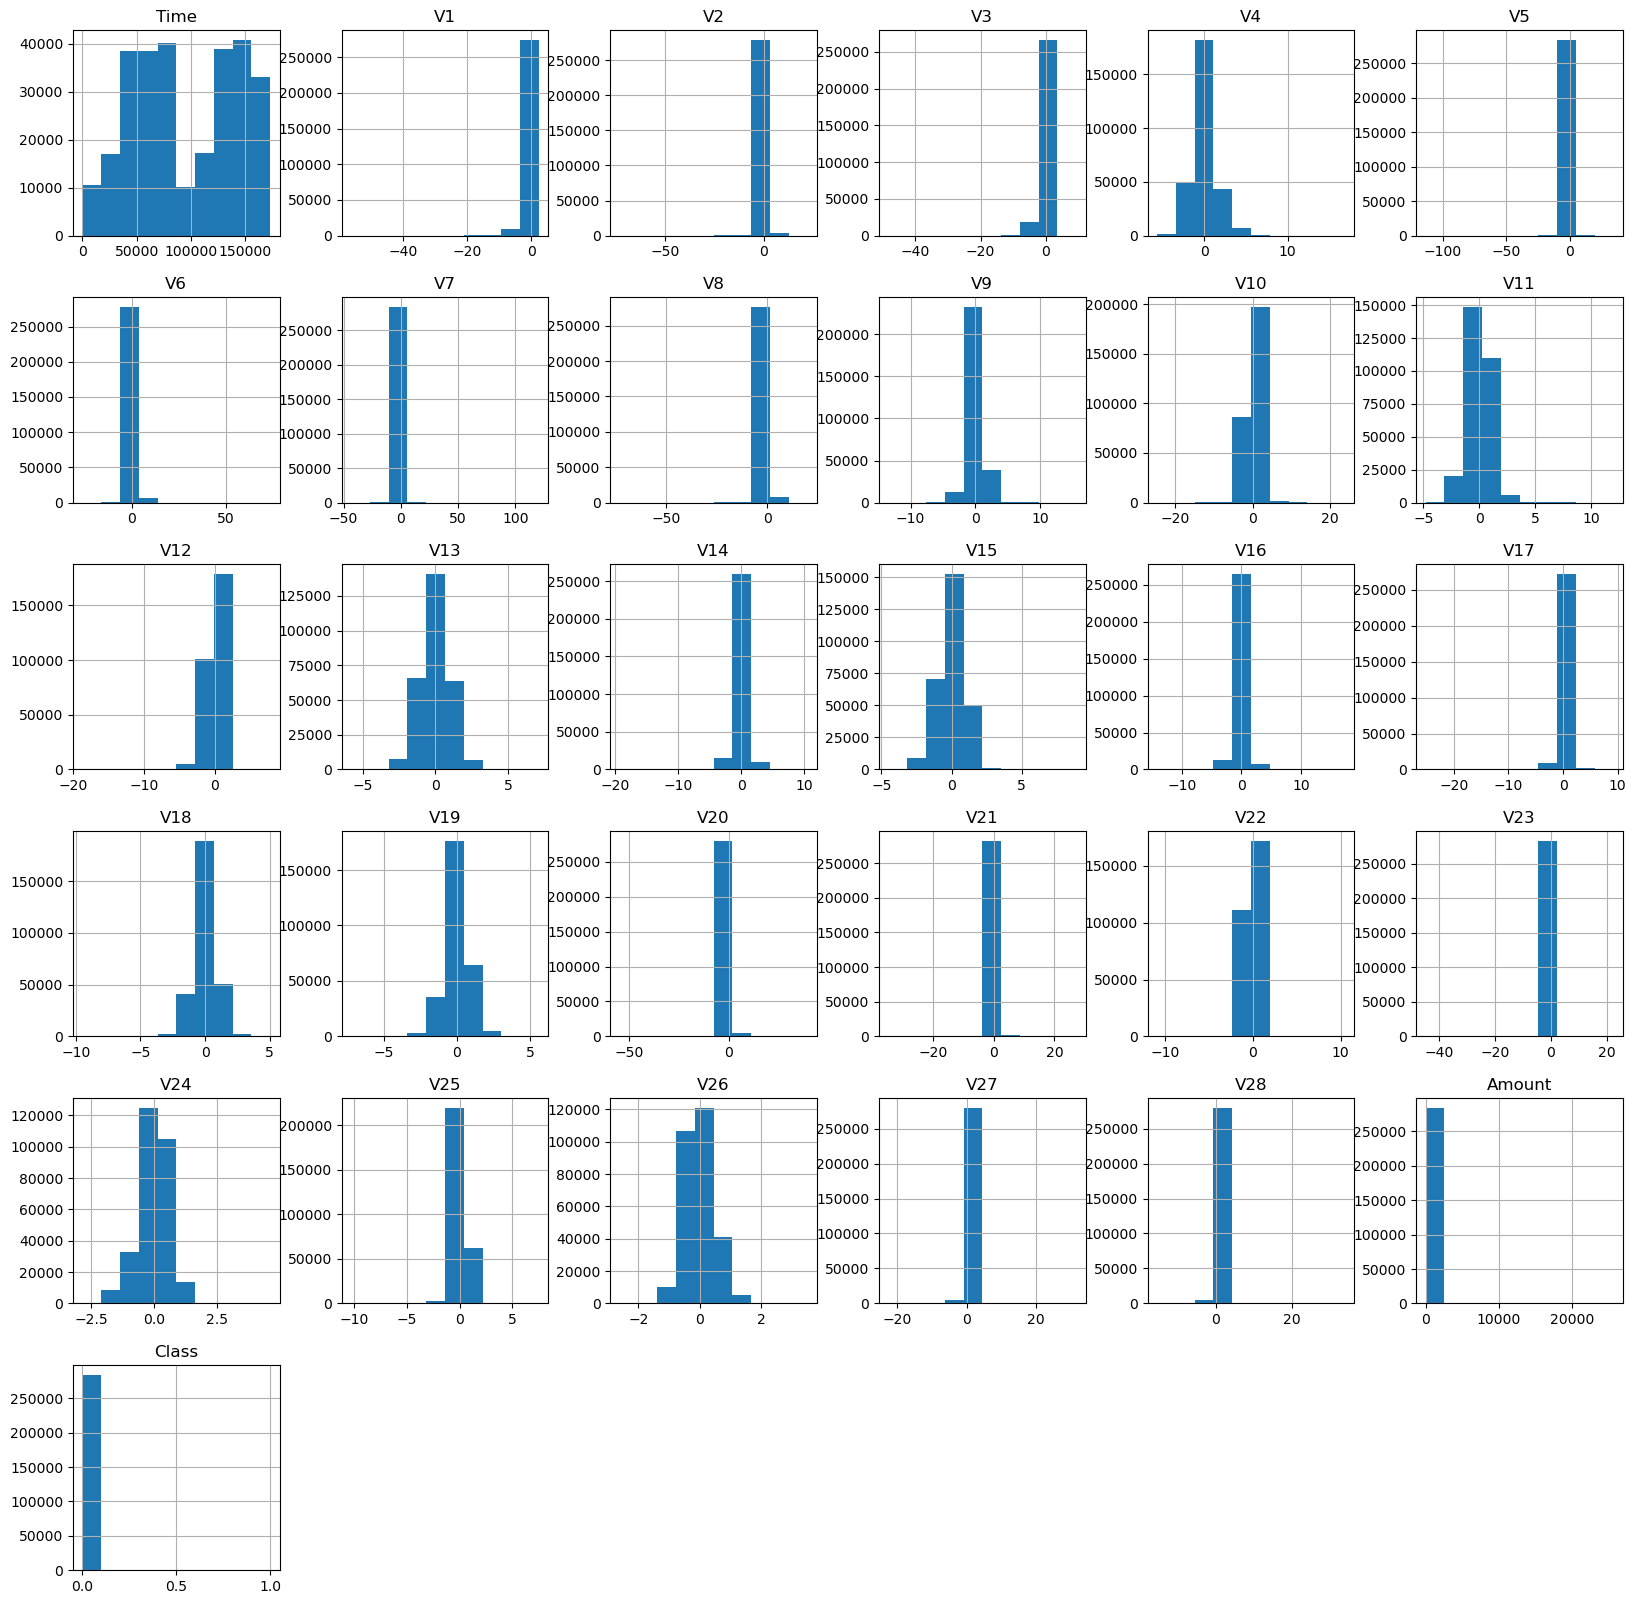

In [11]:
# Plot the histogrm
df.hist(figsize = (20, 20))
plt.show()

Features are scaled so need not to do any standard transformation for preprocessing

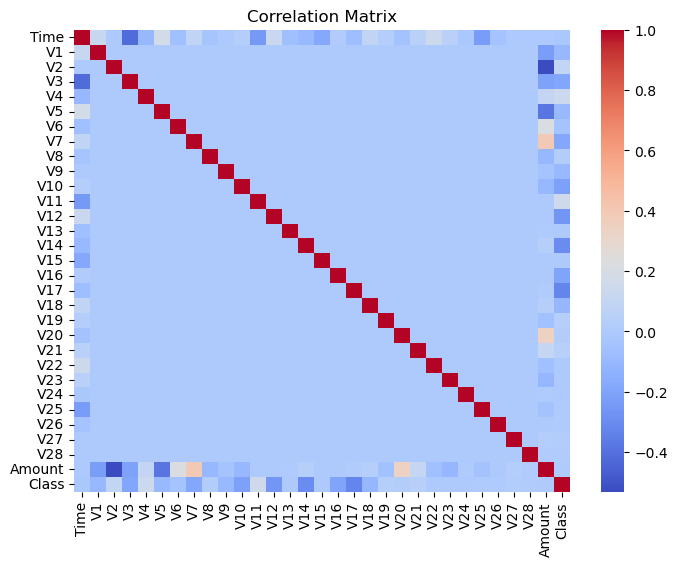

In [12]:
# Print the correlation of data
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is no significant correlation amoung the data so no need for reducing highly correlated data

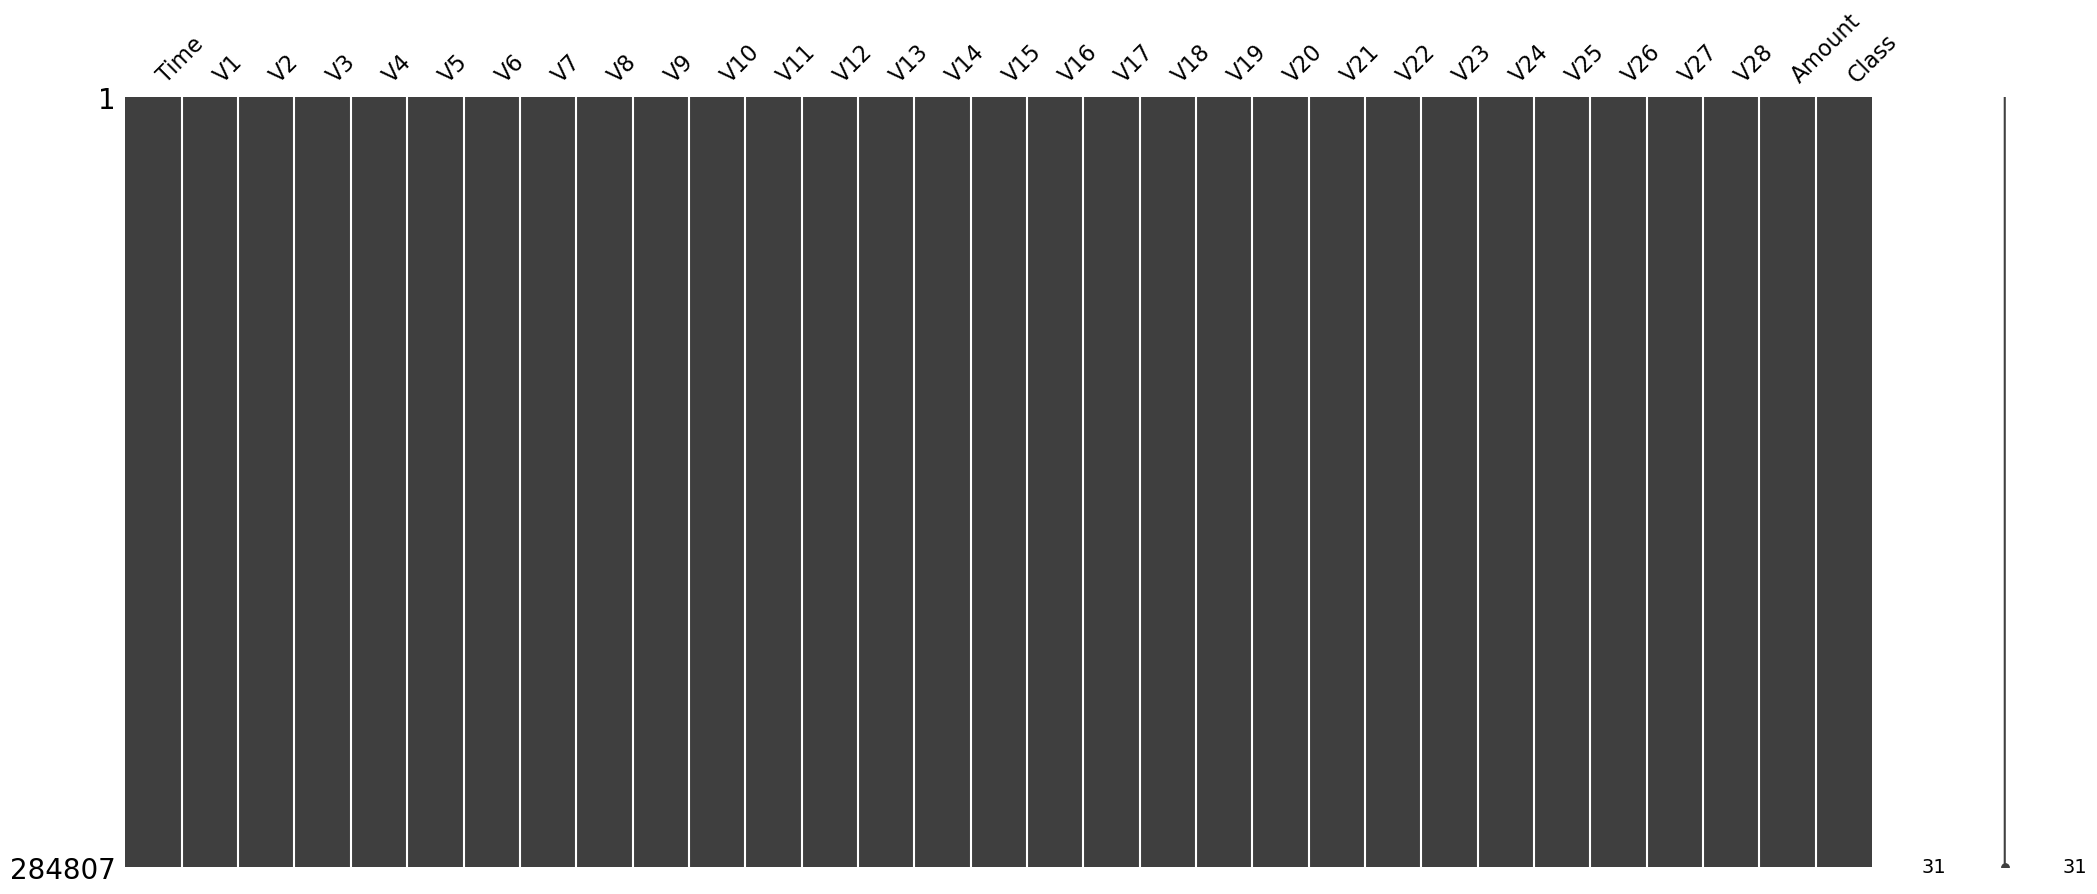

<Figure size 1500x900 with 0 Axes>

In [13]:
# Checking for missing values
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

No missing data, so no requirements for imputation or usage of other methods to handle missing data.

# ANOMALY DETECTION (via isolation Forests)

In [14]:
X = df.drop(['Class'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest model. The contamination parameter should reflect the proportion of fraud cases
iso_forest = IsolationForest(n_estimators=100, contamination=float(np.sum(y == 1)) / len(y))

iso_forest.fit(X_scaled)

# Predict anomalies (1 for inliers, -1 for outliers)
anomalies = iso_forest.predict(X_scaled)

# Convert the predictions to match the 'Class' labels (0 for inliers, 1 for outliers)
anomalies = np.where(anomalies == 1, 0, 1)

df['Anomalies'] = anomalies

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Anomalies
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [16]:
print(classification_report(df['Class'], df['Anomalies']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.61      0.61      0.61    284807
weighted avg       1.00      1.00      1.00    284807



The classification report indicates that:

- The model has perfect precision, recall, and F1-score for the majority class (0), suggesting it identifies non-fraudulent transactions flawlessly.
- The precision, recall, and F1-score for the minority class (1) are all 0.29, indicating that the model is not performing well on the fraudulent transactions. It’s likely that many fraudulent transactions are either not being caught (low recall) or many non-fraudulent transactions are incorrectly being labeled as fraud (low precision).
- The accuracy is perfect, but this is misleading due to the severe class imbalance; the model could be simply predicting everything as the majority class.
- The macro average is 0.64, which isn't high, reflecting the poor performance on the minority class.
- The weighted average F1-score is perfect due to the imbalance heavily weighting the majority class’s performance.

The next steps could involve improving the model’s ability to detect the minority class by trying different models, resampling the data, or using different feature selection methods. It’s also important to focus on metrics beyond accuracy, such as the F1-score or AUC-PR, which are more informative for imbalanced datasets.

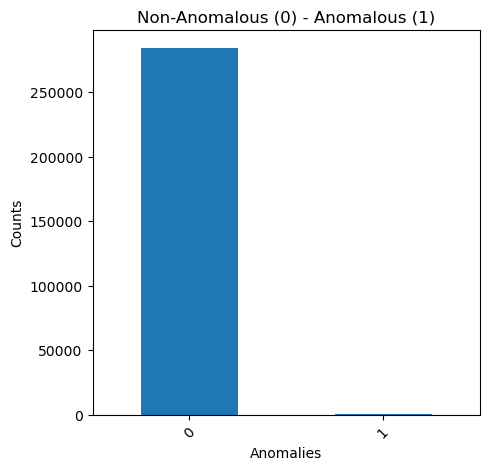

In [17]:
ano = df['Anomalies'].value_counts()

plt.figure(figsize=(5, 5))
ano.plot(kind='bar')
plt.title('Non-Anomalous (0) - Anomalous (1)')
plt.xlabel('Anomalies')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# FEATURE ENGINEERING

In [18]:
# time based features

def time_to_hour(time_in_seconds):
    return (time_in_seconds // (60 * 60)) % 24

df['HourOfDay'] = df['Time'].apply(time_to_hour)
df['Weekend'] = (df['HourOfDay'] >= 0) & (df['HourOfDay'] < 6)
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x else 0)

In [19]:
# amount based features

df['Log_Amount'] = np.log(df['Amount'] + 1e-9)  # Adding a small constant to avoid log(0)

# Amount bins
# Define bins for transaction amount
bins = [0, 25, 50, 75, 100, 125, 150, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7]  # These are arbitrary labels for the bins
df['Amount_bin'] = pd.cut(df['Amount'], bins=bins, labels=labels)

In [20]:
# standardization of OG time and amount
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_HourOfDay'] = scaler.fit_transform(df['HourOfDay'].values.reshape(-1,1))
df['scaled_Log_Amount'] = scaler.fit_transform(df['Log_Amount'].values.reshape(-1,1))
df['scaled_Amount_bin'] = scaler.fit_transform(df['Amount_bin'].values.reshape(-1,1))


df.drop(['Time','Amount', 'HourOfDay', 'Log_Amount', 'Amount_bin'], axis=1, inplace=True)

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,Class,Anomalies,Weekend,scaled_amount,scaled_time,scaled_HourOfDay,scaled_Log_Amount,scaled_Amount_bin
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.133558,-0.021053,0,0,1,0.244964,-1.996583,-2.40693,0.811088,1.578701
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.008983,0.014724,0,0,1,-0.342475,-1.996583,-2.40693,-0.701392,-0.722044
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.055353,-0.059752,0,0,1,1.160686,-1.996562,-2.40693,1.160566,2.038850
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.062723,0.061458,0,0,1,0.140534,-1.996562,-2.40693,0.738878,1.118552
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.219422,0.215153,0,0,1,-0.073403,-1.996541,-2.40693,0.525139,0.198254


In [22]:
nan_columns = df.columns[df.isnull().any()]
print(nan_columns)

Index(['scaled_Amount_bin'], dtype='object')


In [23]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
num_nan_rows = df['scaled_Amount_bin'].isnull().sum()
num_nan_rows


1825

In [24]:
df['scaled_Amount_bin'] = df['scaled_Amount_bin'].fillna(0)

# FEATURE SELECTION

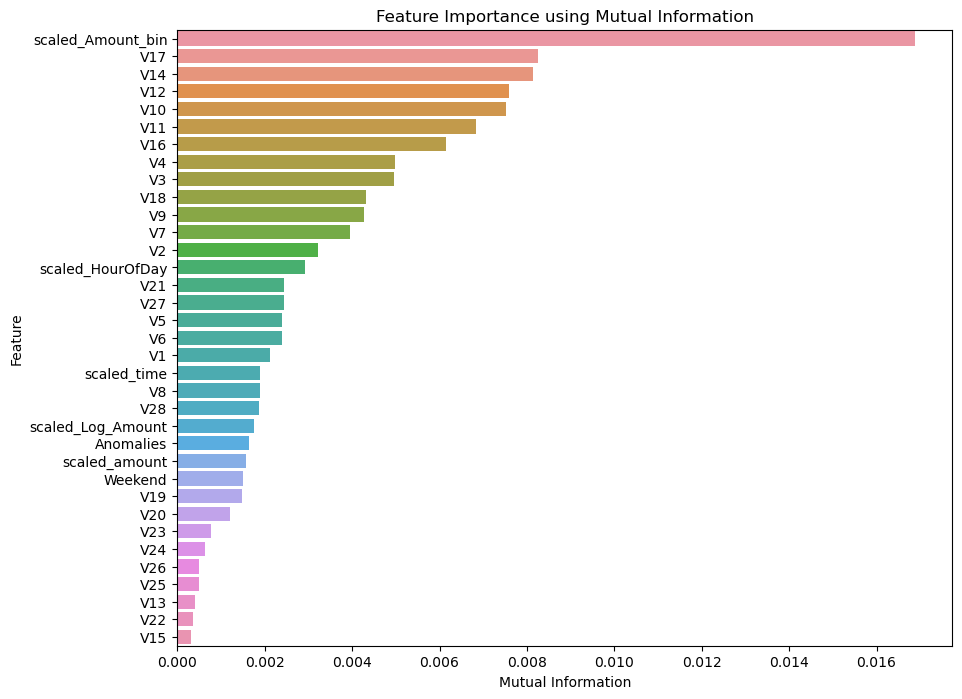

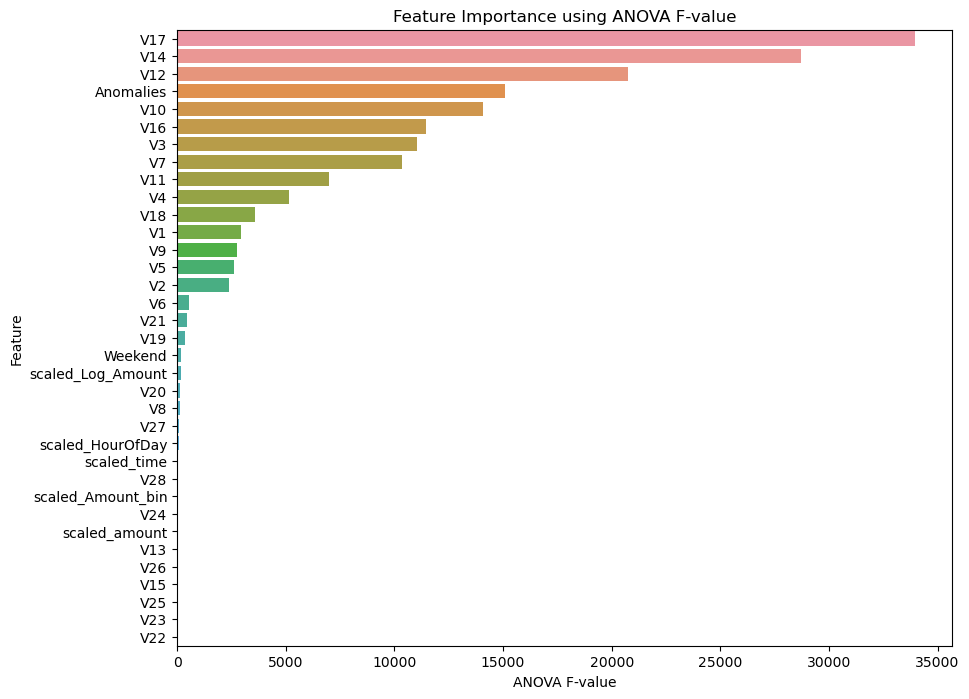

In [25]:
X = df.drop('Class', axis=1)
y = df['Class']

# Calculate mutual information
mi = mutual_info_classif(X, y)
# Calculate ANOVA F-values
f_scores, p_values = f_classif(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi,
    'ANOVA F-value': f_scores,
    'p-value': p_values
})

# Plotting the Mutual Information scores
plt.figure(figsize=(10, 8))
sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False))
plt.title('Feature Importance using Mutual Information')
plt.show()

# Plotting the ANOVA F-values
plt.figure(figsize=(10, 8))
sns.barplot(x='ANOVA F-value', y='Feature', data=feature_scores.sort_values(by='ANOVA F-value', ascending=False))
plt.title('Feature Importance using ANOVA F-value')
plt.show()

In [26]:
# # Define a threshold for feature importance, for example, features in the bottom 10% of both methods
# threshold_mi = feature_scores['Mutual Information'].quantile(0.25)
# threshold_f = feature_scores['ANOVA F-value'].quantile(0.25)

# # Identify low importance features from both Mutual Information and ANOVA F-value
# low_importance_features = feature_scores[
#     (feature_scores['Mutual Information'] <= threshold_mi) &
#     (feature_scores['ANOVA F-value'] <= threshold_f)
# ]['Feature'].tolist()

In [27]:
anova_threshold = 1000  

# Identify features that fall below this threshold
features_to_remove = feature_scores[feature_scores['ANOVA F-value'] < anova_threshold]['Feature'].tolist()

In [28]:
features_to_remove

['V6',
 'V8',
 'V13',
 'V15',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Weekend',
 'scaled_amount',
 'scaled_time',
 'scaled_HourOfDay',
 'scaled_Log_Amount',
 'scaled_Amount_bin']

In [29]:
df = df.drop(columns=features_to_remove)

In [31]:
df.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class,Anomalies
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         284807 non-null  float64
 1   V2         284807 non-null  float64
 2   V3         284807 non-null  float64
 3   V4         284807 non-null  float64
 4   V5         284807 non-null  float64
 5   V7         284807 non-null  float64
 6   V9         284807 non-null  float64
 7   V10        284807 non-null  float64
 8   V11        284807 non-null  float64
 9   V12        284807 non-null  float64
 10  V14        284807 non-null  float64
 11  V16        284807 non-null  float64
 12  V17        284807 non-null  float64
 13  V18        284807 non-null  float64
 14  Class      284807 non-null  int64  
 15  Anomalies  284807 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 34.8 MB


In [33]:
df.isnull().values.any()

False

In [35]:
df_features = df.drop('Class', axis=1)

In [36]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [46]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scaled)

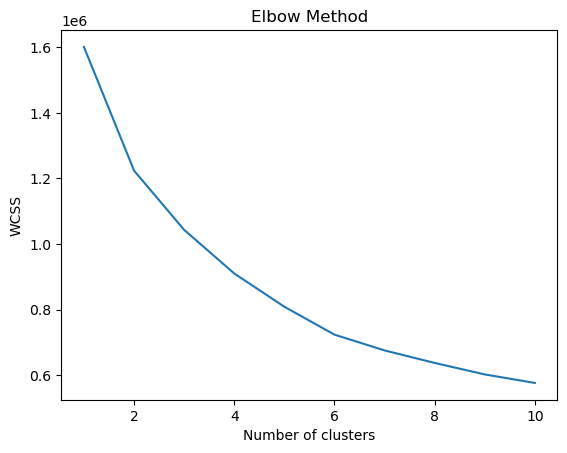

In [49]:
# Determine the number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_pca)

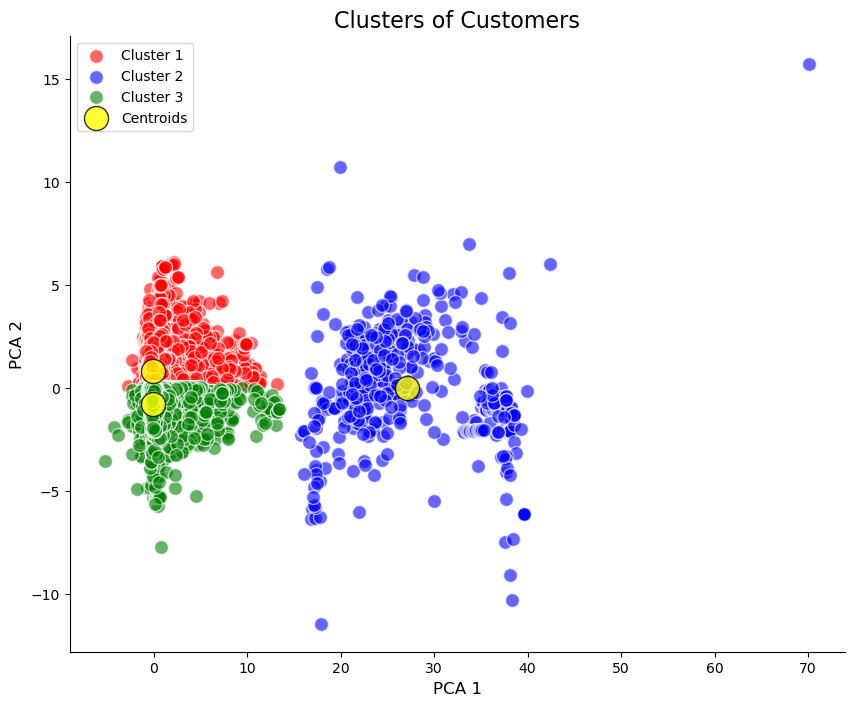

In [42]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'blue', 'green']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot each cluster
for i, color, label in zip(range(3), colors, labels):
    ax.scatter(df_pca[pred_y == i, 0], df_pca[pred_y == i, 1], s = 100, c = color, label = label, alpha=0.6, edgecolors='w')

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', alpha=0.8, edgecolors='black')

# Set the title and labels
ax.set_title('Clusters of Customers', fontsize=16)
ax.set_xlabel('PCA 1', fontsize=12)
ax.set_ylabel('PCA 2', fontsize=12)

# Set the legend
ax.legend()

# Remove the top and right spines from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [50]:
from sklearn import metrics

# Assuming 'pred_y' are your predicted cluster labels and 'df_pca' is your PCA-transformed data
silhouette_score = metrics.silhouette_score(df_pca, pred_y)
davies_bouldin_score = metrics.davies_bouldin_score(df_pca, pred_y)
calinski_harabasz_score = metrics.calinski_harabasz_score(df_pca, pred_y)

print(f'Silhouette Score: {silhouette_score}')
print(f'Davies-Bouldin Score: {davies_bouldin_score}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_score}')